<a href="https://colab.research.google.com/github/jayanzth/Dementia-Detection/blob/main/Dementia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset from the CSV file
file_path = "preprocessed_dataset.xlsx"
dataset = pd.read_excel(file_path)

# Assuming 'target' is your target variable, separate features and target
X = dataset.drop('Group', axis=1)
y = dataset['Group']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can use X_train and y_train for training your model
# and X_test and y_test for evaluating its performance


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = "preprocessed_dataset.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Drop unnecessary columns
data = data.drop(["Subject ID", "MRI ID"], axis=1)

# Handle missing values
data.fillna(data.mean(), inplace=True)  # For mean imputation

# Encode categorical variables
data = pd.get_dummies(data, columns=["M/F", "Hand"])

# Split data into features (X) and target (y)
X = data.drop("Group", axis=1)
y = data["Group"]

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<ipython-input-6-f2fe6cf25633>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)  # For mean imputation


            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  371.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.485175   
std      0.922843   635.485118    7.640957    2.876339    1.113393   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.121584    0.729556    1.195460  
std      3.683244    0.374557   176.135956    0.037141    0.138105  
min      4.000000    0.000000  1105.652499    0.644399    0.875539  
25%     27.000000    0.0

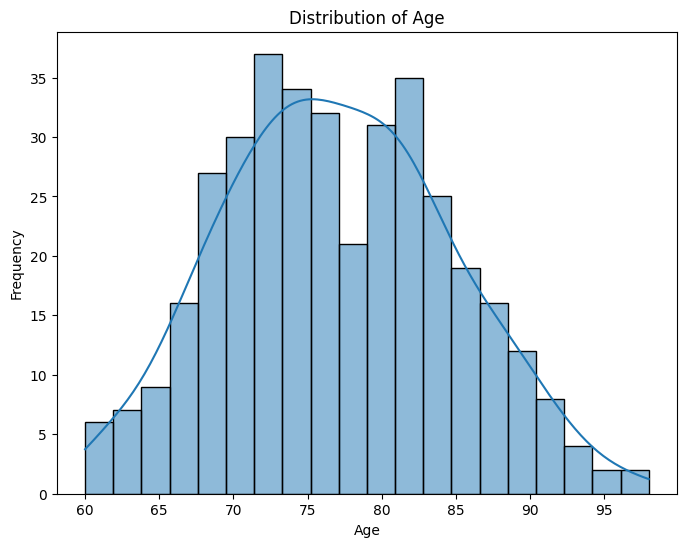

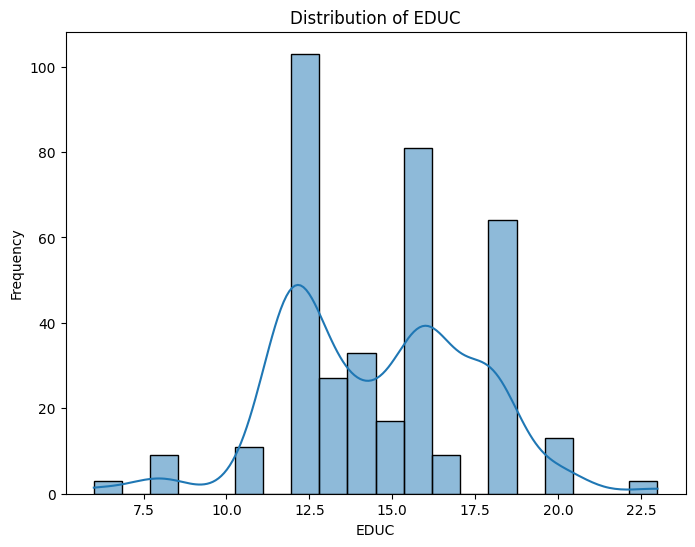

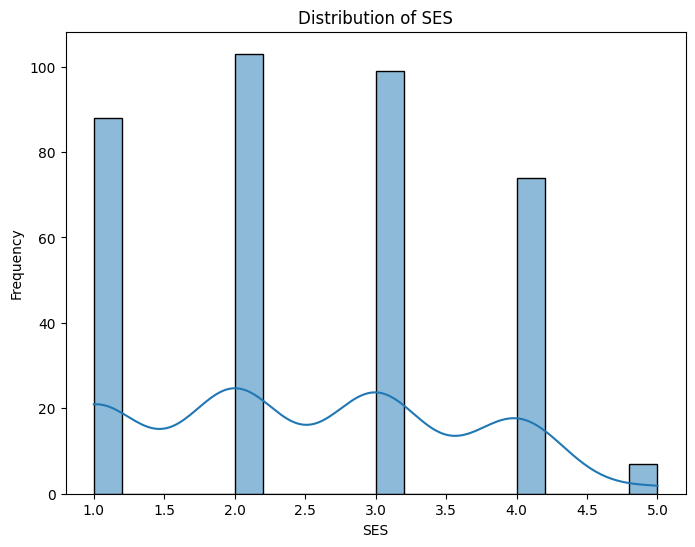

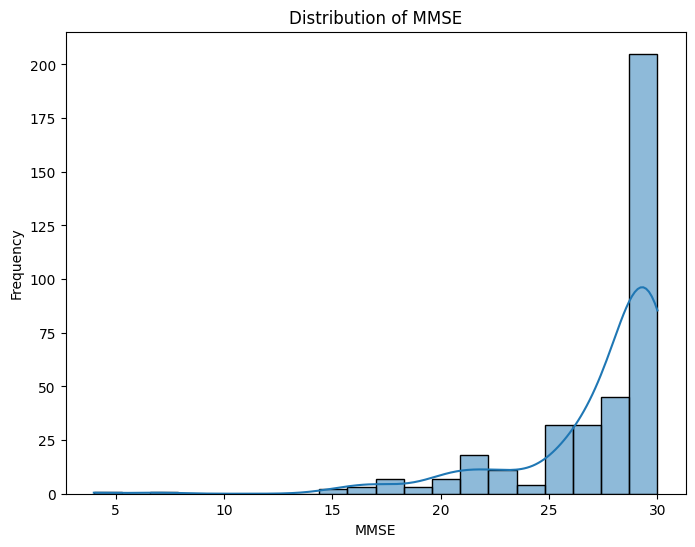

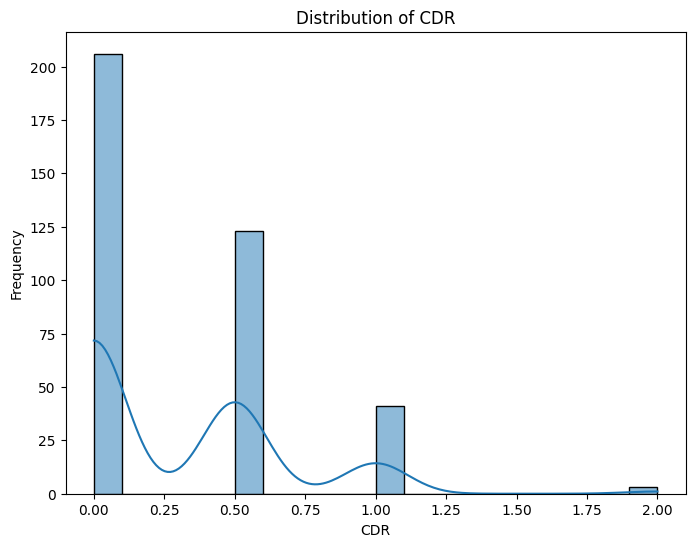

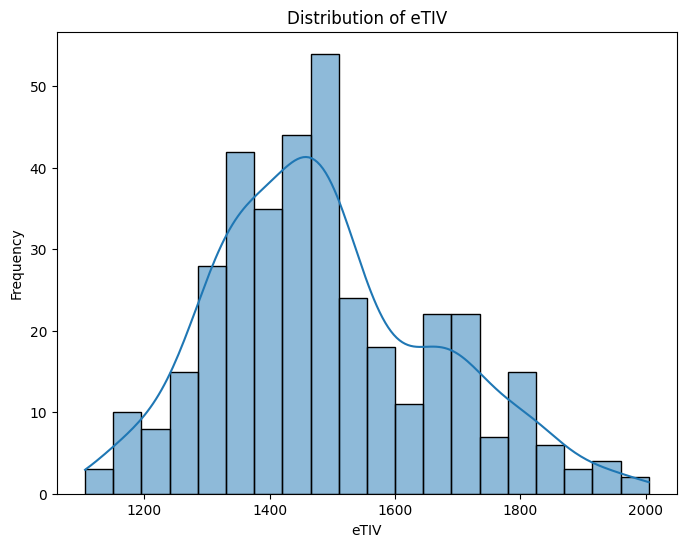

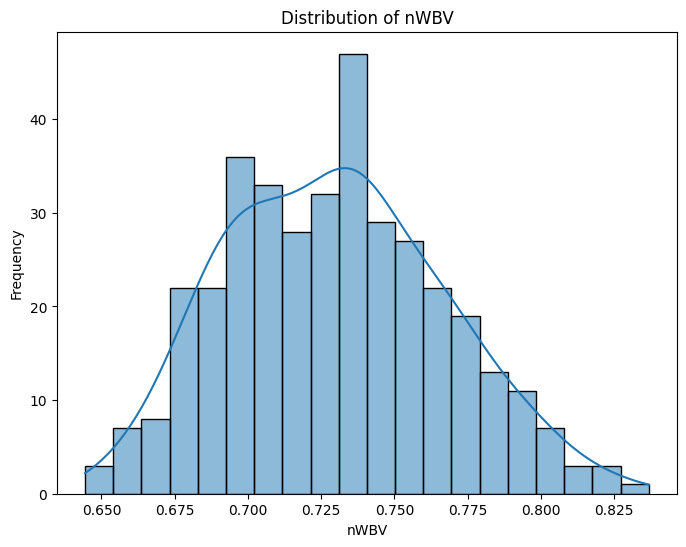

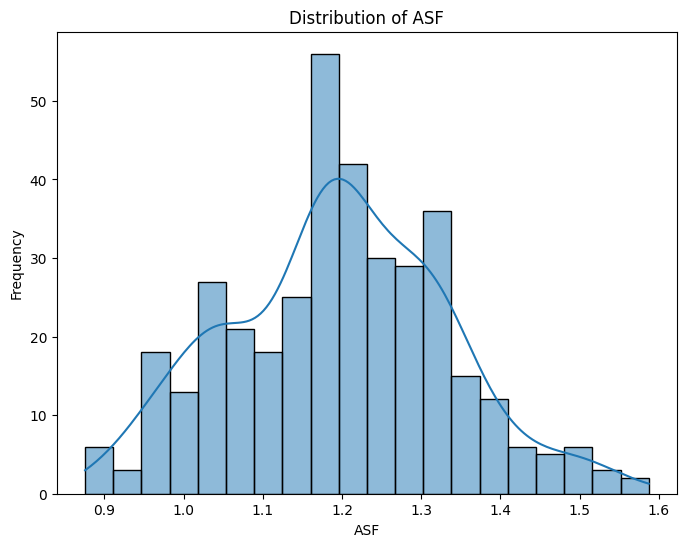

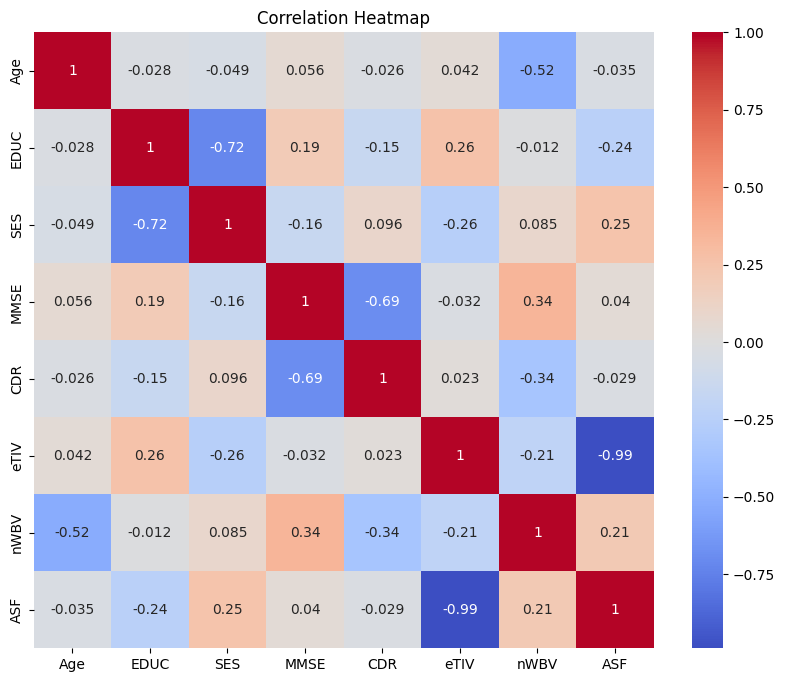

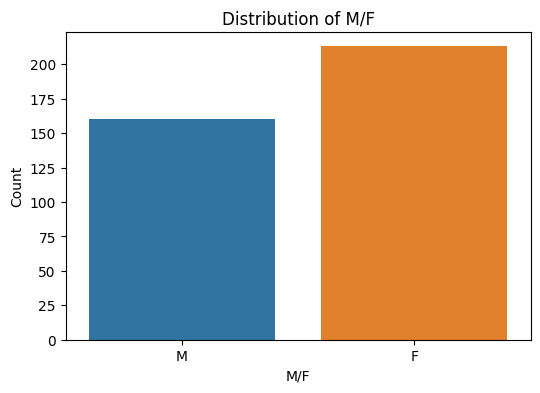

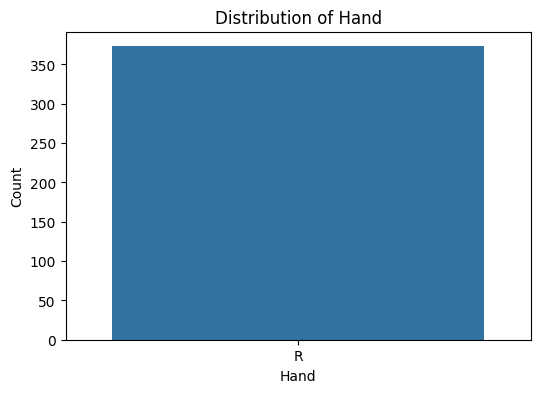

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "preprocessed_dataset.xlsx"  # Replace with your file path
data = pd.read_excel(file_path)

# Basic summary statistics
summary_stats = data.describe()
print(summary_stats)

# Visualize the distribution of numerical features
numerical_features = ["Age", "EDUC", "SES", "MMSE", "CDR", "eTIV", "nWBV", "ASF"]
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=20, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Visualize correlations between numerical features
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Visualize categorical features
categorical_features = ["M/F", "Hand"]
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()
